
--- Cadeia N=100 ---


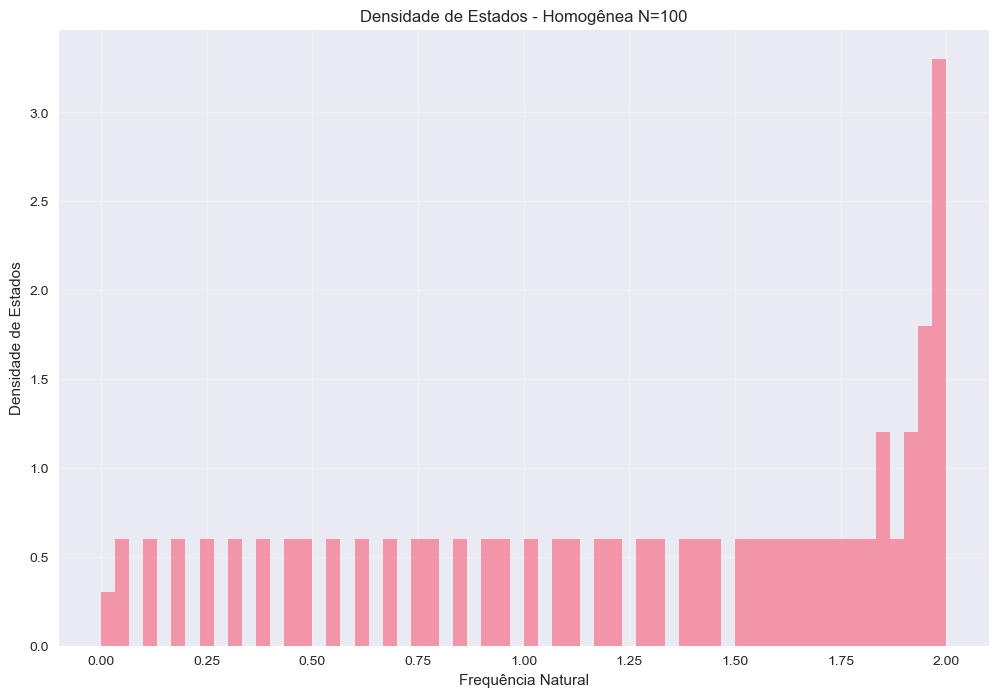

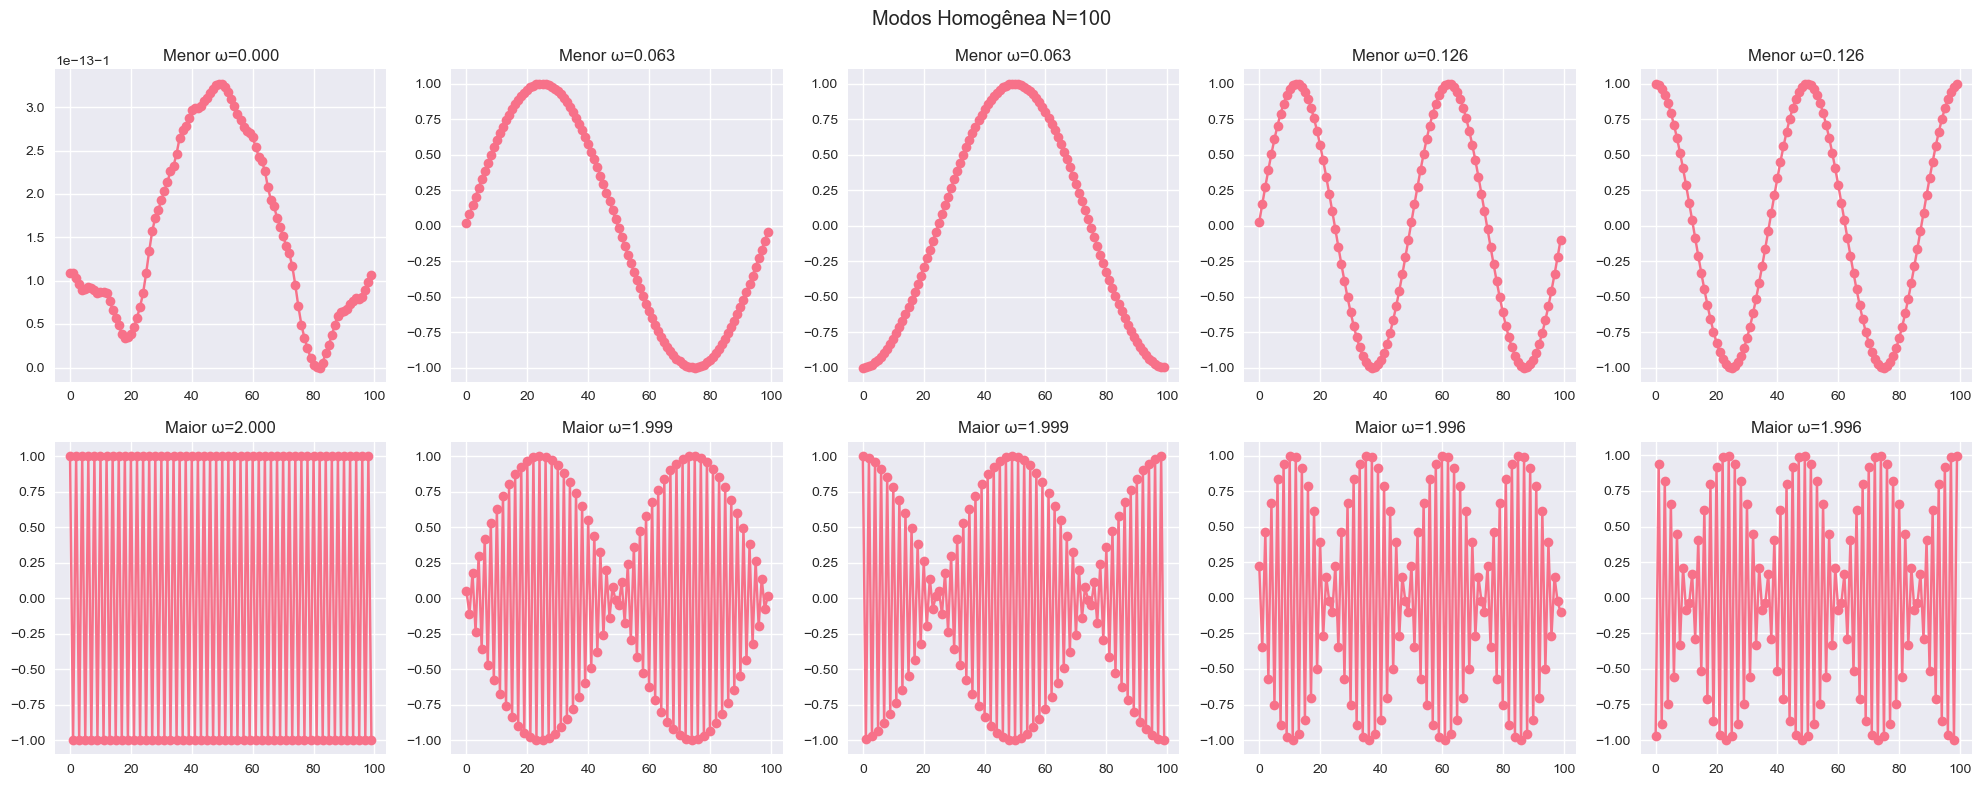

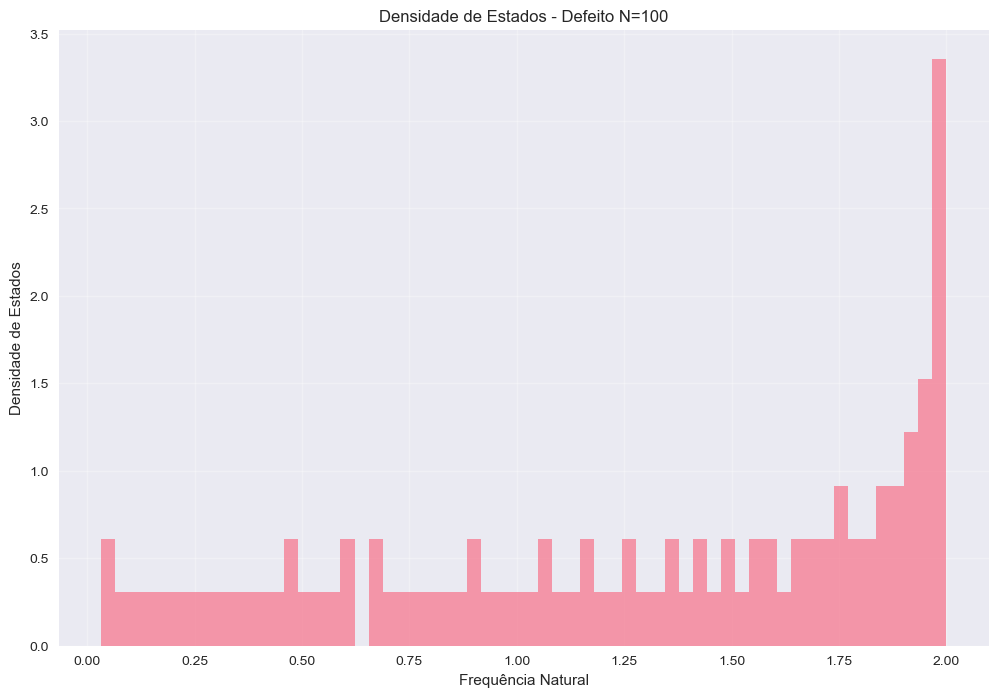

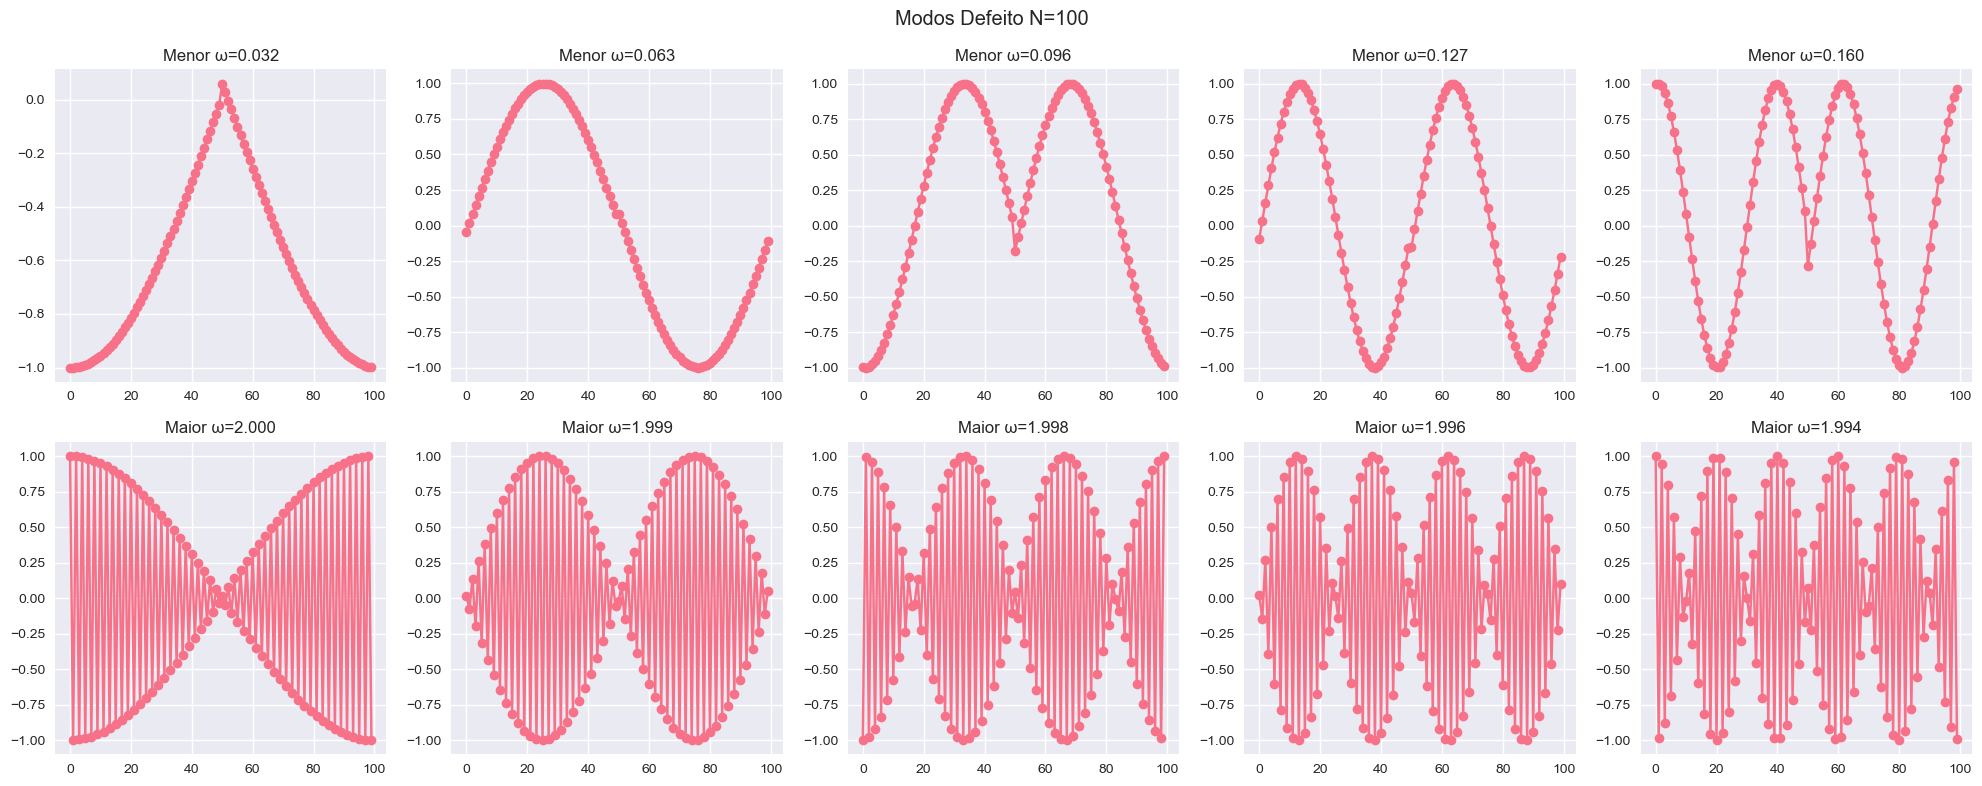

Cinco menores frequências (homogênea): [3.58867478e-08 6.28215182e-02 6.28215182e-02 1.25581039e-01
 1.25581039e-01]
Cinco menores frequências (defeito): [0.03213622 0.06345187 0.09634165 0.12681671 0.16035361]
Cinco maiores frequências (homogênea): [1.99605346 1.99605346 1.99901312 1.99901312 2.        ]
Cinco maiores frequências (defeito): [1.99390334 1.9960731  1.99780451 1.99901804 1.99975602]

--- Cadeia N=1000 ---


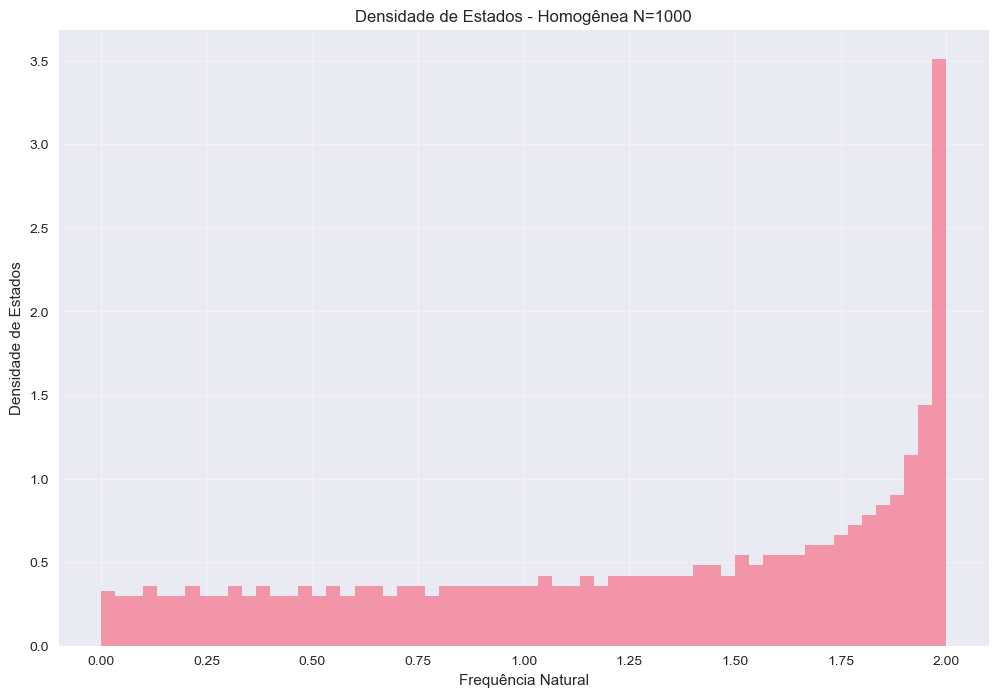

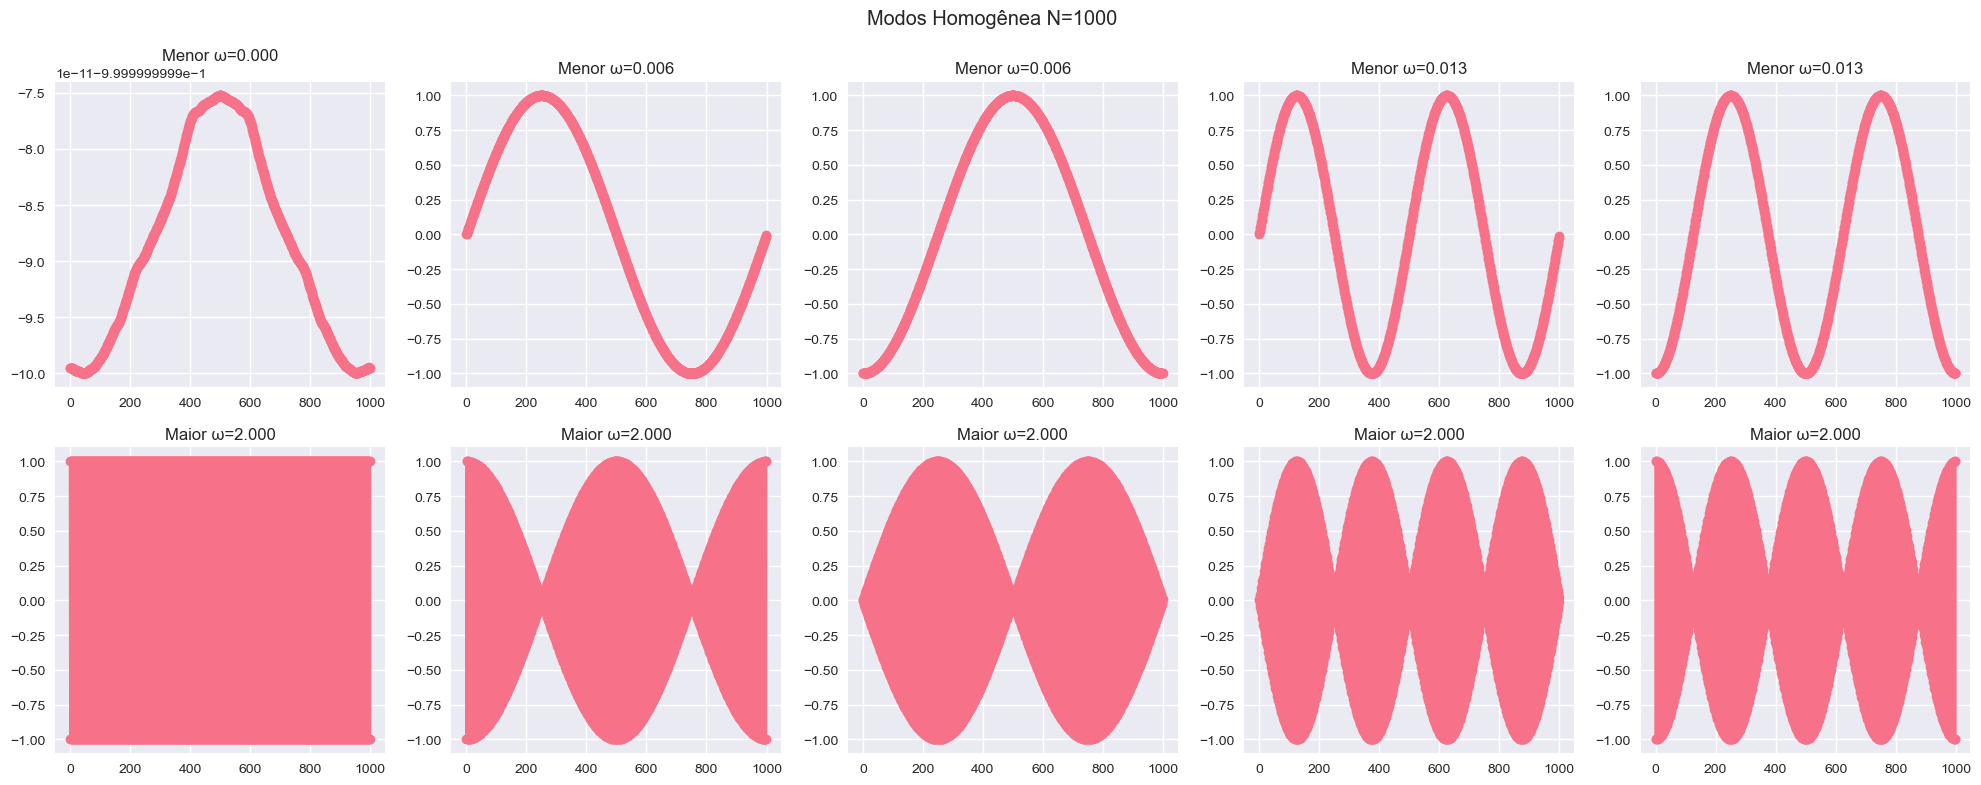

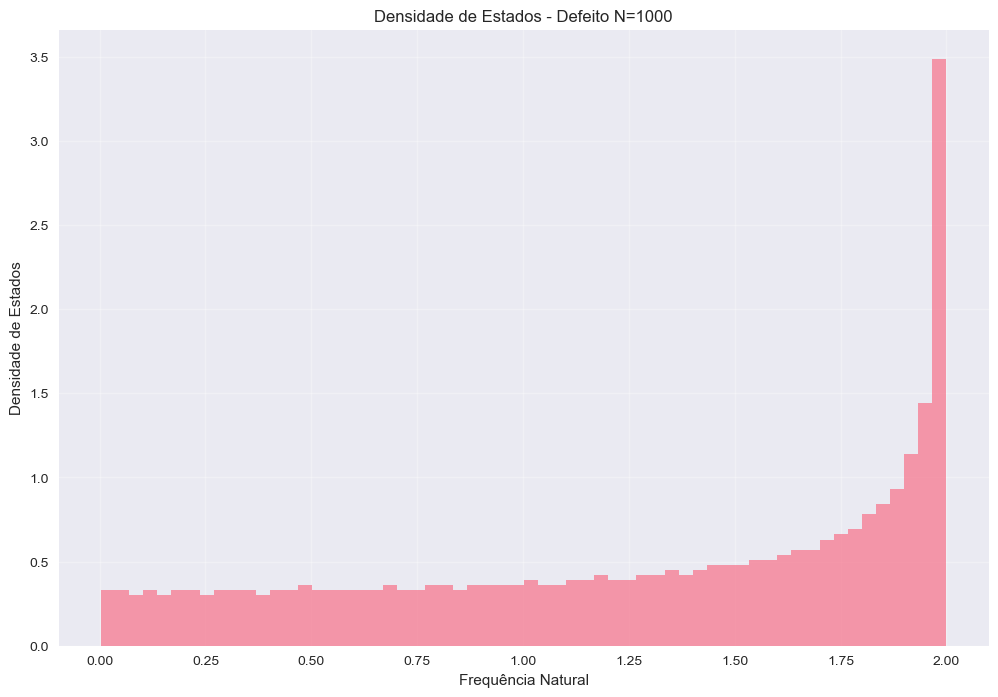

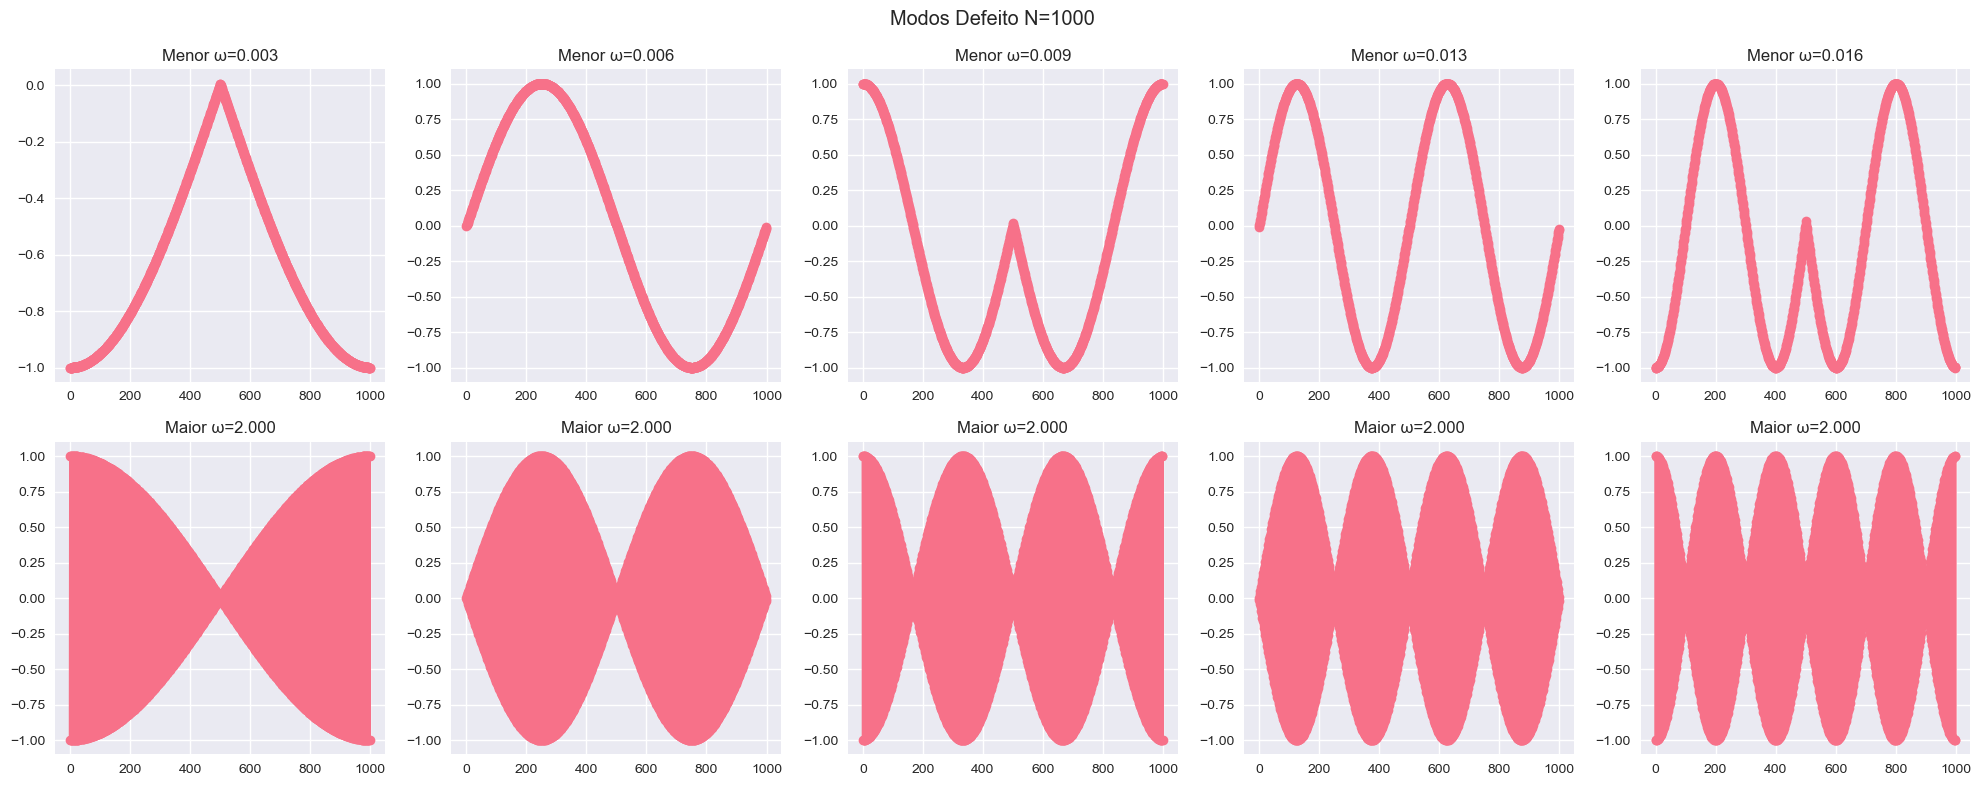

Cinco menores frequências (homogênea): [1.51889544e-08 6.28317497e-03 6.28317497e-03 1.25662879e-02
 1.25662879e-02]
Cinco menores frequências (defeito): [0.00314868 0.00628946 0.00944599 0.01257886 0.01574321]
Cinco maiores frequências (homogênea): [1.99996052 1.99996052 1.99999013 1.99999013 2.        ]
Cinco maiores frequências (defeito): [1.99993838 1.99996054 1.99997782 1.99999014 1.99999754]

--- Cadeia N=10000 ---


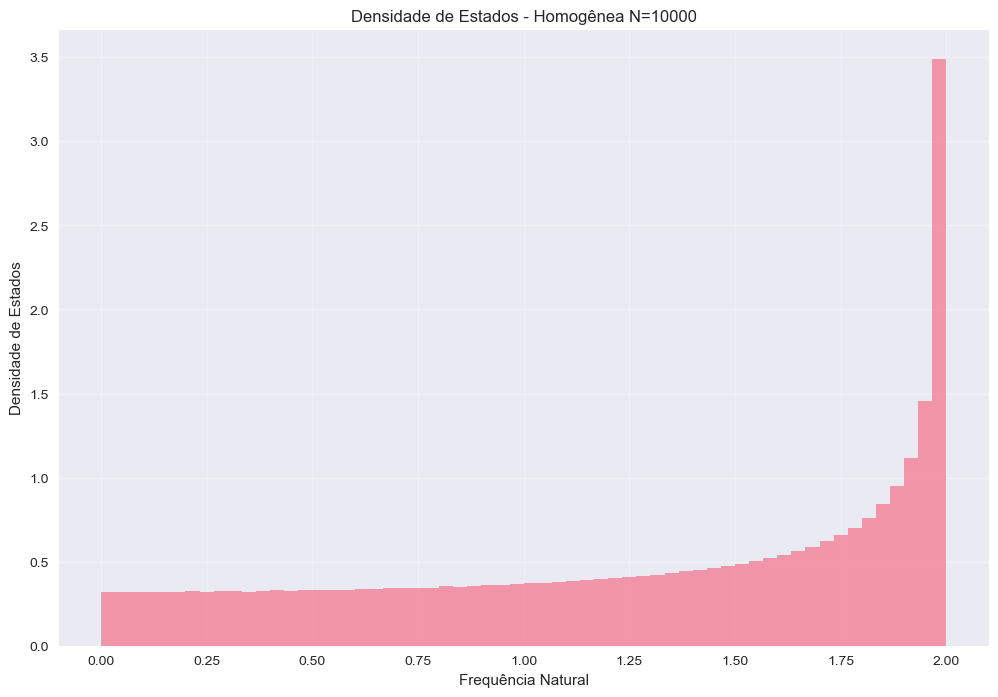

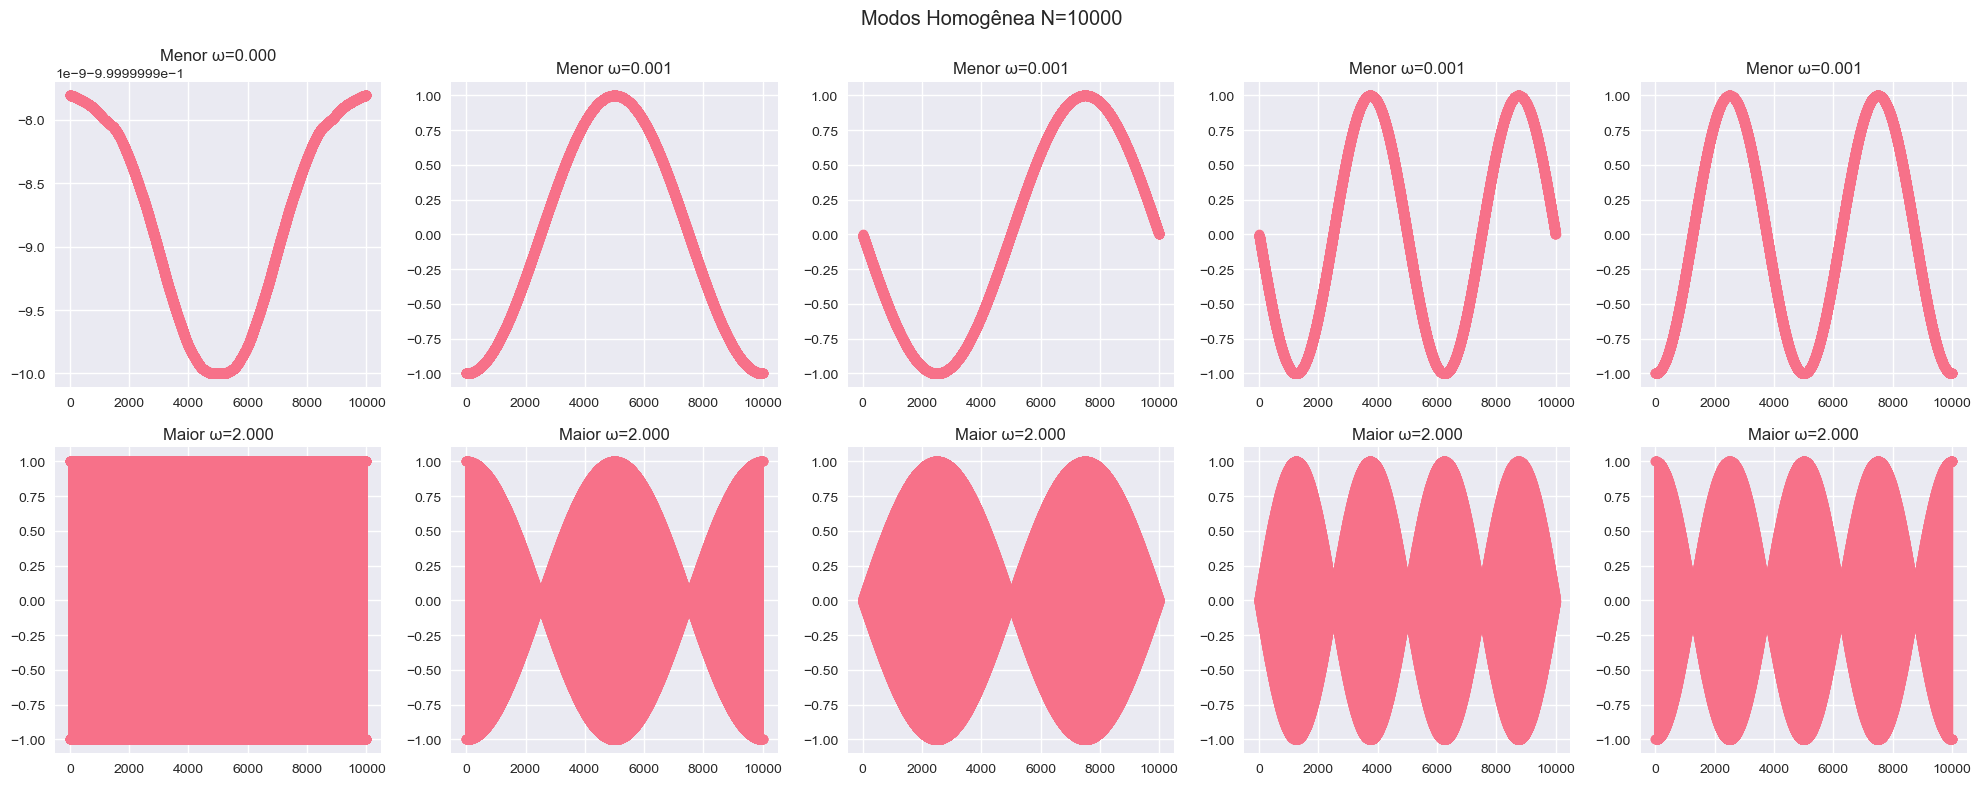

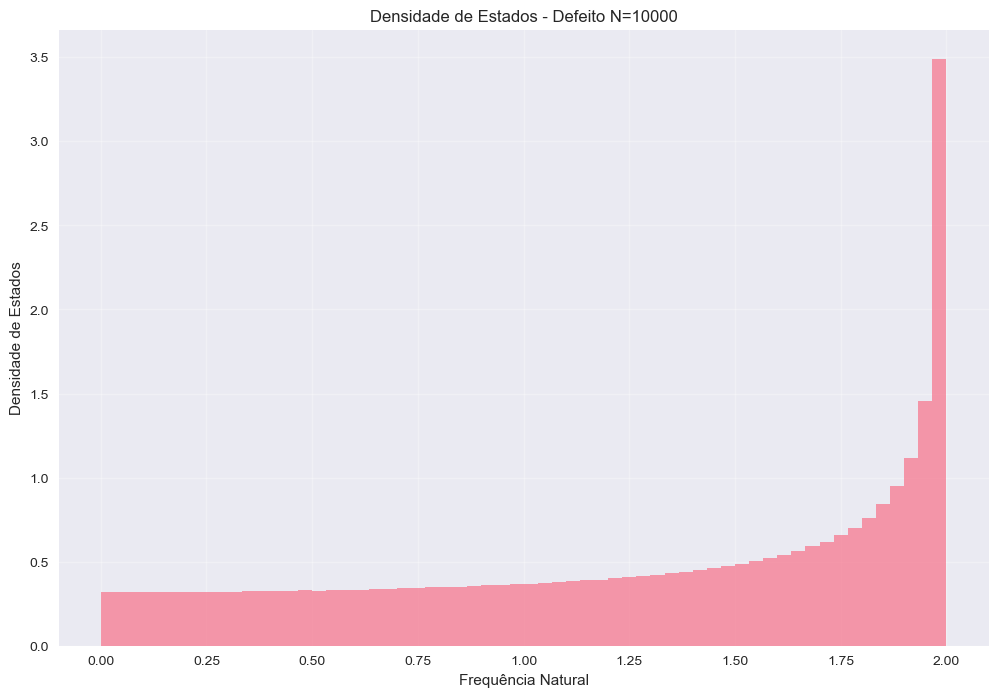

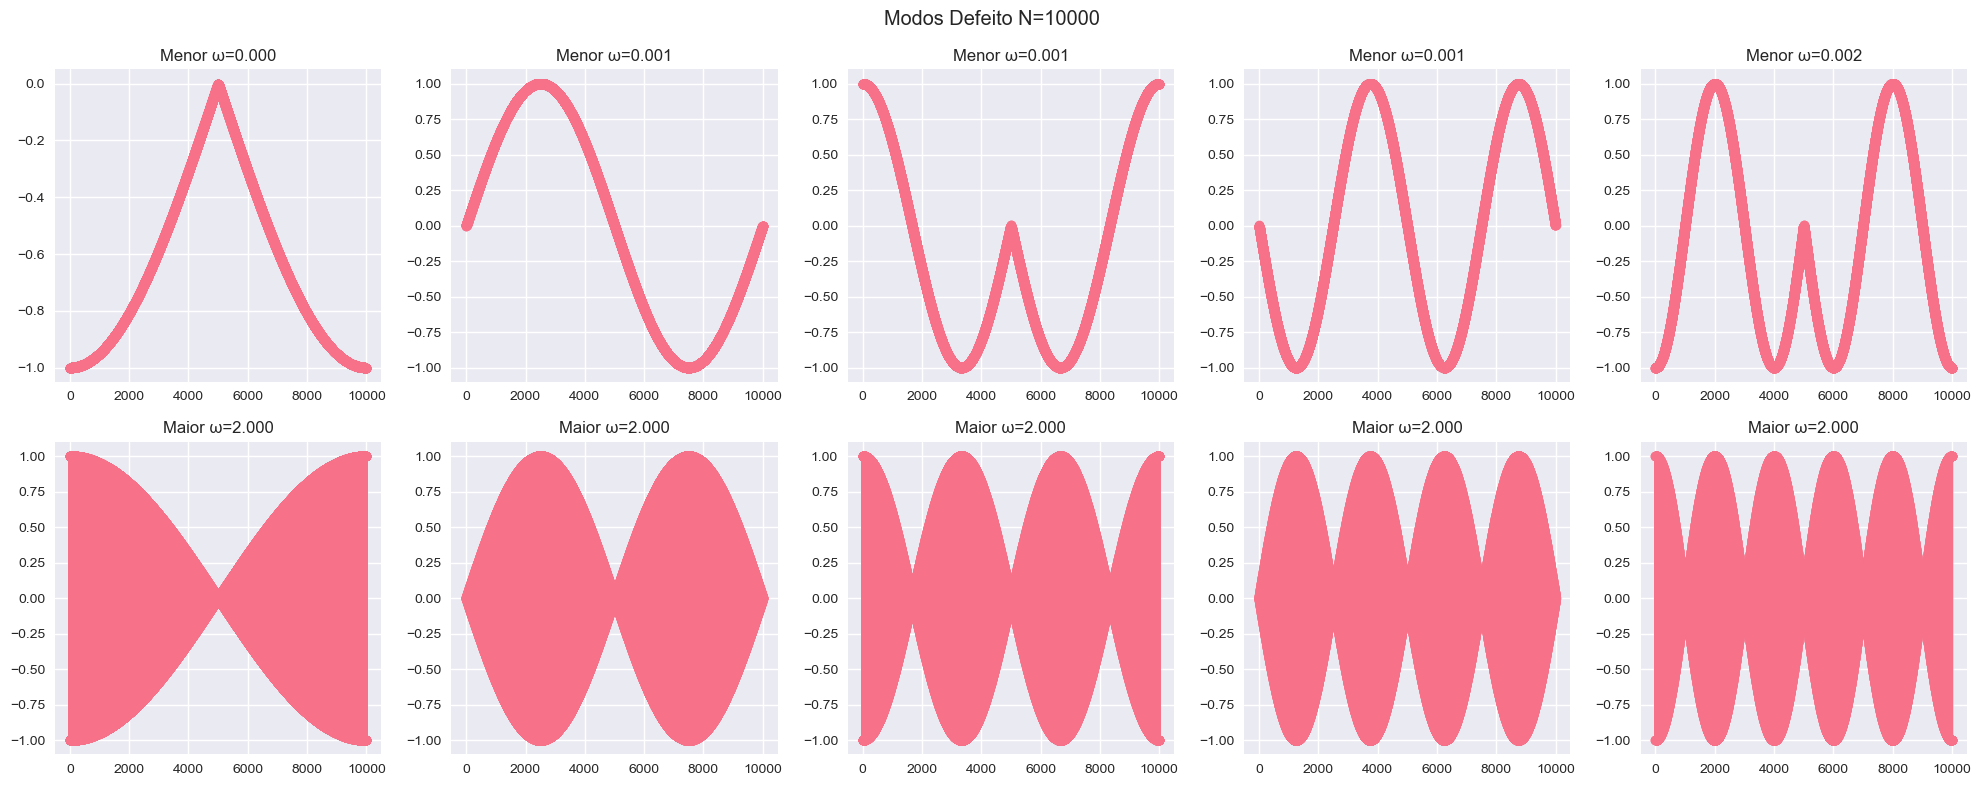

Cinco menores frequências (homogênea): [7.25581655e-09 6.28318520e-04 6.28318521e-04 1.25663698e-03
 1.25663698e-03]
Cinco menores frequências (defeito): [0.00031423 0.00062838 0.00094269 0.00125676 0.00157115]
Cinco maiores frequências (homogênea): [1.99999961 1.99999961 1.9999999  1.9999999  2.        ]
Cinco maiores frequências (defeito): [1.99999938 1.99999961 1.99999978 1.9999999  1.99999998]


In [1]:
import numpy as np
from scipy.linalg import eigh
import seaborn as sns

import matplotlib.pyplot as plt

# Configuração de visualização
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")
plt.rcParams['figure.figsize'] = (12, 8)
plt.rcParams['font.size'] = 12

class CadeiaCircular:
    """
    Classe para calcular frequências naturais e modos normais de cadeias atômicas circulares.
    """
    def __init__(self, massas, k=1.0):
        self.massas = np.array(massas)
        self.k = k
        self.N = len(massas)
    
    def matriz_dinamica(self):
        """
        Monta a matriz dinâmica para cadeia circular.
        """
        N = self.N
        K = np.zeros((N, N))
        for i in range(N):
            K[i, i] += 2 * self.k
            K[i, (i-1)%N] -= self.k
            K[i, (i+1)%N] -= self.k
        M_inv = np.diag(1/self.massas)
        D = M_inv @ K
        return D
    
    def frequencias_e_modos(self):
        """
        Calcula frequências naturais e modos normais.
        """
        D = self.matriz_dinamica()
        vals, vecs = eigh(D)
        freq = np.sqrt(np.abs(vals))
        idx = np.argsort(freq)
        return freq[idx], vecs[:, idx]

def densidade_de_estados(freq, bins=50):
    """
    Calcula e plota histograma (densidade de estados).
    """
    plt.hist(freq, bins=bins, density=True, alpha=0.7)
    plt.xlabel('Frequência Natural')
    plt.ylabel('Densidade de Estados')
    plt.grid(True, alpha=0.3)

def plot_modos(vecs, freq, title, n=5):
    """
    Plota os modos normais para as n menores e n maiores frequências.
    """
    N = vecs.shape[0]
    x = np.arange(N)
    fig, axes = plt.subplots(2, n, figsize=(4*n, 8))
    for i in range(n):
        axes[0, i].plot(x, vecs[:, i]/np.max(np.abs(vecs[:, i])), 'o-')
        axes[0, i].set_title(f'Menor ω={freq[i]:.3f}')
        axes[1, i].plot(x, vecs[:, -i-1]/np.max(np.abs(vecs[:, -i-1])), 'o-')
        axes[1, i].set_title(f'Maior ω={freq[-i-1]:.3f}')
    fig.suptitle(title)
    plt.tight_layout()
    plt.show()

def simular_cadeia(N, m=1.0, k=1.0, defeito=False):
    """
    Simula cadeia homogênea ou com defeito de massa central.
    """
    massas = np.ones(N) * m
    if defeito:
        massas[N//2] = 5*m
    cadeia = CadeiaCircular(massas, k)
    freq, modos = cadeia.frequencias_e_modos()
    return freq, modos

def analise_completa():
    tamanhos = [100, 1000, 10000]
    m = 1.0
    k = 1.0

    for N in tamanhos:
        print(f"\n--- Cadeia N={N} ---")
        # Homogênea
        freq_h, modos_h = simular_cadeia(N, m, k, defeito=False)
        plt.figure()
        densidade_de_estados(freq_h, bins=60)
        plt.title(f'Densidade de Estados - Homogênea N={N}')
        plt.show()
        plot_modos(modos_h, freq_h, f'Modos Homogênea N={N}', n=5)

        # Defeito
        freq_d, modos_d = simular_cadeia(N, m, k, defeito=True)
        plt.figure()
        densidade_de_estados(freq_d, bins=60)
        plt.title(f'Densidade de Estados - Defeito N={N}')
        plt.show()
        plot_modos(modos_d, freq_d, f'Modos Defeito N={N}', n=5)

        # Tabela comparativa
        print("Cinco menores frequências (homogênea):", freq_h[:5])
        print("Cinco menores frequências (defeito):", freq_d[:5])
        print("Cinco maiores frequências (homogênea):", freq_h[-5:])
        print("Cinco maiores frequências (defeito):", freq_d[-5:])

if __name__ == "__main__":
    analise_completa()